In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# show table
data = pd.read_excel("/Users/rebecca/Desktop/ZHAW/Frühlingssemester_2023/SP/Project_SP/snb2.xlsx")

data.head(10)





,Übersicht,Aktiven - Gold und Forderungen aus Goldgeschäften,Aktiven - Reserveposition beim IWF,Aktiven - Internationale Zahlungsmittel,Aktiven - Währungshilfekredite
0,2020-01,"51,119.63","1,357.28","4,348.53",347.62
1,2020-02,"52,291.99","1,314.62","4,327.83",345.12
2,2020-03,"51,920.26","1,291.87","4,164.86",476.49
3,2020-04,"55,331.26","1,664.82","4,191.57",761.66
4,2020-05,"55,658.78","1,682.01","4,491.83",940.86
5,2020-06,"56,231.99","1,654.32","4,451.67",932.85
6,2020-07,"59,949.05","1,623.74","4,369.81",912.63
7,2020-08,"59,468.90","1,589.21","4,370.77",911.89
8,2020-09,"58,229.25","1,872.82","4,418.53",922.53
9,2020-10,"57,556.26","1,866.72","4,404.61",918.65


In [26]:
import sqlite3
import pandas as pd
import re

# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('datenbank_snb2.db')
cursor = conn.cursor()

# Connect to the SQLite database
query = "SELECT * FROM Gold"  # execute sql query
cursor.execute(query)
result_list = cursor.fetchall()

# Data preparation and table creation
table_data = []
header = ["Date", "Amount"]  # Header for the date and amount columns

for row in result_list:
    date = row[0]  # Assuming the date is in the first column of the result
    other_data = []

    # Convert strings to numerical values using regular expressions
    for value in row[1:]:
        if isinstance(value, str):
            numeric_value = re.sub(r'[^\d.]+', '', value)  # Remove non-digit characters
            if numeric_value:
                amount_formatted = "{:,.2f}".format(float(numeric_value)).replace(",", "'")  # Format with thousands separator
                other_data.append(amount_formatted)
               
            else:
                other_data.append(None)
        else:
            other_data.append(value)

    table_data.append([date] + other_data)

# Create a pandas DataFrame
df = pd.DataFrame(table_data, columns=header)

# Round the "Amount" column to two decimal places
df['Amount'] = df['Amount'].round(2)


print("Asset: Gold")

pd.options.display.float_format = "{:,.2f}".format  # Set the default display format for float values
print(df)

# Close the database connection
conn.close()


Asset: Gold
       Date    Amount
0   2020-01 51,119.63
1   2020-02 52,291.99
2   2020-03 51,920.26
3   2020-04 55,331.26
4   2020-05 55,658.78
5   2020-06 56,231.99
6   2020-07 59,949.05
7   2020-08 59,468.90
8   2020-09 58,229.25
9   2020-10 57,556.26
10  2020-11 53,685.18
11  2020-12 55,747.12
12  2021-01 55,389.18
13  2021-02 52,895.90
14  2021-03 53,421.08
15  2021-04 53,838.07
16  2021-05 57,381.65
17  2021-06 54,358.64
18  2021-07 55,280.74
19  2021-08 55,301.77
20  2021-09 54,468.17
21  2021-10 54,142.78
22  2021-11 55,231.68
23  2021-12 55,690.74


In [27]:
import sqlite3
import pandas as pd
import re

# Connect to the SQLite database
conn = sqlite3.connect('datenbank_snb2.db') 
cursor = conn.cursor()

# execute sql query
query = """SELECT 'Gold' AS Table_Name, SUM(Position) AS Total_Position FROM Gold
UNION ALL
SELECT 'InternationaleZahlungsmittel' AS Table_Name, SUM(Position) AS Total_Position FROM InternationaleZahlungsmittel
UNION ALL
SELECT 'Reserve' AS Table_Name, SUM(Position) AS Total_Position FROM Reserve;
"""
cursor.execute(query)
result_list = cursor.fetchall()

# Data preparation and table creation
table_data = []
header = ["Asset", "Sum"]  # Header for the date and amount columns

for row in result_list:
    date = row[0]  # Assuming the date is in the first column of the result
    other_data = []

    # Convert strings to numerical values using regular expressions
    for value in row[1:]:
        if isinstance(value, str):
            numeric_value = re.sub(r'[^\d.]+', '', value)  # Remove non-digit characters
            if numeric_value:
                amount_formatted = "{:,.2f}".format(float(numeric_value)).replace(",", "'")  # Format with thousands separator
                other_data.append(amount_formatted)
               
            else:
                other_data.append(None)
        else:
            other_data.append(value)

    table_data.append([date] + other_data)

# Create a pandas DataFrame
df = pd.DataFrame(table_data, columns=header)

# Round the "Amount" column to two decimal places
df['Sum'] = df['Sum'].round(2)


pd.options.display.float_format = "{:,.2f}".format  # Set the default display format for float values
print(df)

# Close the database connection
conn.close()


                          Asset          Sum
0                          Gold 1,324,590.06
1  InternationaleZahlungsmittel   142,403.44
2                       Reserve    42,772.61


In [28]:
# mean, max, min, standardabweichung for descriptive analyses

import sqlite3
import re
import numpy as np
from scipy.stats import f_oneway
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('datenbank_snb2.db')
cursor = conn.cursor()

# List of table names
table_names = ["Gold", "InternationaleZahlungsmittel",
               "Reserve", "Währungshilfekredite"]

# Data preparation and statistics calculation for each table
for table_name in table_names:
    # Assuming there's a column 'JahrMonat' for the date
    query = f"SELECT JahrMonat, Position FROM {table_name}"
    cursor.execute(query)
    result_list = cursor.fetchall()

    dates = []
    amounts = []

    for row in result_list:
        dates.append(row[0])
        value = row[1]
        if isinstance(value, str):
            # Remove non-digit characters
            numeric_value = re.sub(r'[^\d.]+', '', value)
            if numeric_value:
                amounts.append(float(numeric_value))
            else:
                amounts.append(None)
        else:
            amounts.append(value)

    # Calculate statistics for the amounts column
    amounts = np.array(amounts)
    mean = np.mean(amounts)
    max_value = np.max(amounts)
    min_value = np.min(amounts)
    std_dev = np.std(amounts)

    # Print the statistics results for the table
    print(f"Asset: {table_name}")
    print("Mean:", mean.round(2))
    print("Max:", max_value.round(2))
    print("Min:", min_value.round(2))
    print("Standard Deviation:", std_dev.round(2))
    print()

 # Example usage of loop control statements
    if mean > 1000:
        print("Mean is greater than 1000. Exiting the loop.")
        break

    if max_value > 5000:
        print("Maximum value is greater than 5000. Skipping this table.")
        pass


# Close the database connection
conn.close()


Asset: Gold
Mean: 55191.25
Max: 59949.05
Min: 51119.63
Standard Deviation: 2169.83

Mean is greater than 1000. Exiting the loop.


In [29]:
import sqlite3
import re
import numpy as np
from scipy.stats import f_oneway

# Connect to the SQLite database
conn = sqlite3.connect('datenbank_snb2.db') 
cursor = conn.cursor()

# List of table names
table_names = ["Gold", "InternationaleZahlungsmittel", "Reserve", "Währungshilfekredite"]

# Data preparation and statistics calculation for each table
table_data = []

for table_name in table_names:
    query = f"SELECT Position FROM {table_name}"
    cursor.execute(query)
    result_list = cursor.fetchall()

    amounts = []

    for row in result_list:
        value = row[0]
        if isinstance(value, str):
            numeric_value = re.sub(r'[^\d.]+', '', value)  # Remove non-digit characters
            if numeric_value:
                amounts.append(float(numeric_value))
            else:
                amounts.append(None)
        else:
            amounts.append(value)

    # Store the amounts column in the table_data list
    table_data.append(amounts)

# Perform ANOVA test
f_statistic, p_value = f_oneway(*table_data)

# Print the ANOVA results
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

# Close the database connection
conn.close()


ANOVA F-Statistic: 4583.252109994261
ANOVA p-value: 5.313450712931599e-100


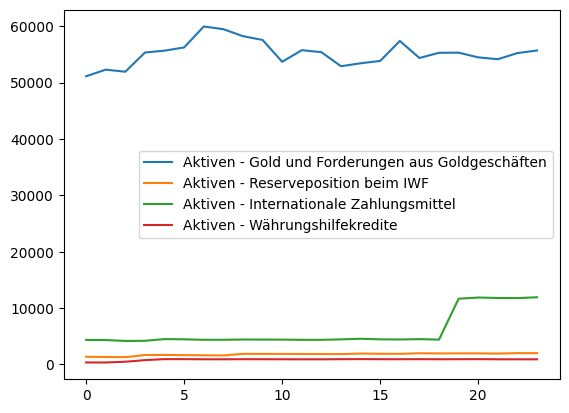

In [30]:
# graph plotten 
data.plot()

plt.show()


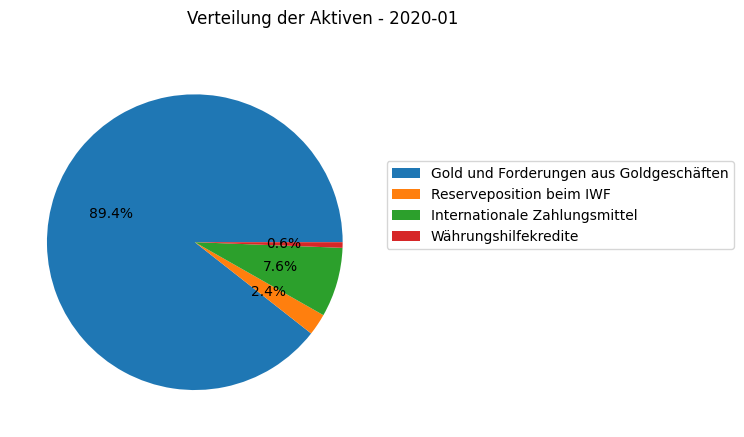

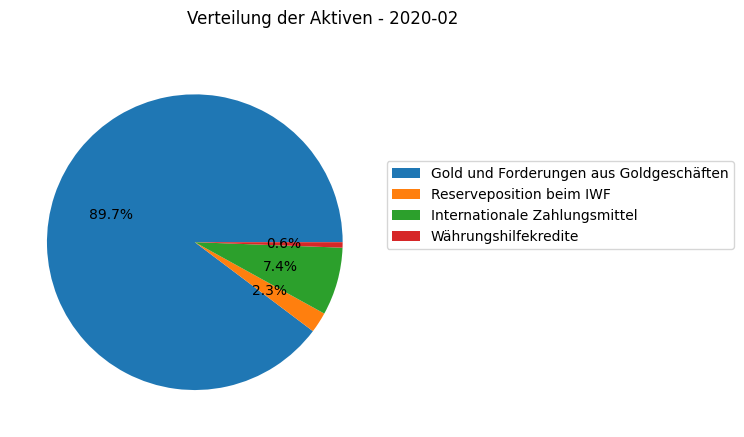

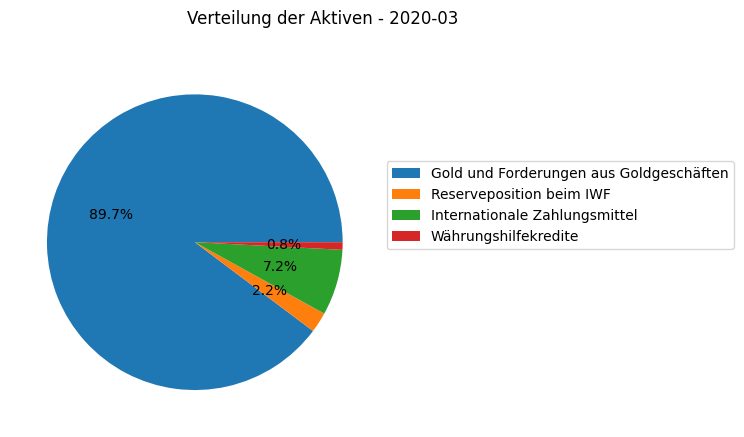

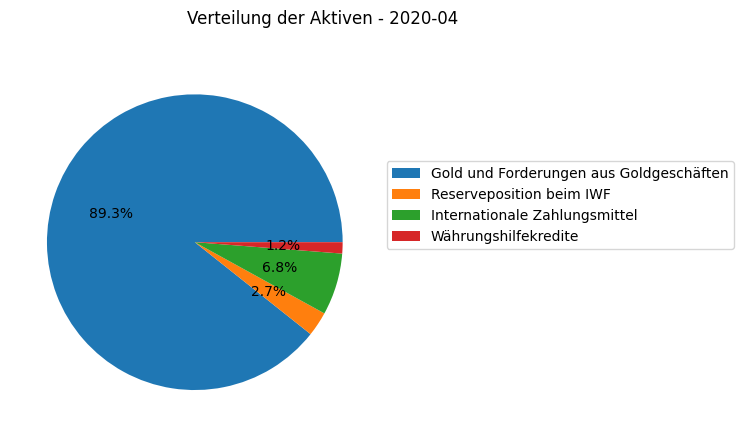

In [31]:
import matplotlib.pyplot as plt

# Data for Pie-Chart
data = [
    ['2020-01', 51119.6319, 1357.281079, 4348.52943, 347.6192427],
    ['2020-02', 52291.98641, 1314.623212, 4327.827212, 345.1162577],
    ['2020-03', 51920.26084, 1291.86913, 4164.863706, 476.4898326],
    ['2020-04', 55331.25711, 1664.81605, 4191.570537, 761.6554115]
]


# Loop over the data and create a pie chart for each row
for row in data:
    row_label = row[0]
    row_data = row[1:]
    
    # Create the pie chart
    plt.pie(row_data, autopct='%1.1f%%')

 
    # add title
    plt.suptitle('Verteilung der Aktiven - {}'.format(row_label), ha='left', fontsize=12)

    # Aktivposten-Labels
    labels = ['Gold und Forderungen aus Goldgeschäften', 'Reserveposition beim IWF', 'Internationale Zahlungsmittel', 'Währungshilfekredite']

   
    # Add the title of the active next to the pie chart
    plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.6))
    
    # show pie chart
    plt.show()




In [32]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 21.3.0
Datetime: 2023-05-24 20:17:15
Python Version: 3.10.9
-----------------------------------
